In [1]:
# running in kaggle
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -O ./spark-3.3.2-bin-hadoop2.tgz https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
!tar zxvf ./spark-3.3.2-bin-hadoop2.tgz
!wget -O /kaggle/working/spark-3.3.2-bin-hadoop2/jars/graphframes-0.8.2-spark3.2-s_2.12.jar  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-02-19 20:18:12--  https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274077580 (261M) [application/x-gzip]
Saving to: ‘./spark-3.3.2-bin-hadoop2.tgz’

./spark-3.3.2-bin-h 100%[===================>] 261.38M   220MB/s    in 1.2s    

2023-02-19 20:18:14 (220 MB/s) - ‘./spark-3.3.2-bin-hadoop2.tgz’ saved [274077580/274077580]

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
spark-3.3.2-bin-hadoop2/
spark-3.3.2-bin-hadoop2/LICENSE
spark-3.3.2-bin-hadoop2/NOTICE
spark-3.3.2-bin-hadoop2/R/
spark-3.3.2-bin-hadoo

In [2]:
# running in Colab
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -O ./spark-3.3.2-bin-hadoop2.tgz https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
# !tar zxvf ./spark-3.3.2-bin-hadoop2.tgz
# !wget -O /content/spark-3.3.2-bin-hadoop2/jars/graphframes-0.8.2-spark3.2-s_2.12.jar  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar

In [3]:
!pip install findspark
!pip install pyspark
!pip install graphframes

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 19.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824024 sha256=ce7abb600e90b2b6b11904d0d8e172382389c2f0623c2c55368b6c28025c387d
  Stored in directory: /root/.cache/pip/wheels/07/fb/67/b9f2c0242d156eaa136b45ae4fd99d3e7c0ecc2acfd26f47b9
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [4]:
# imports
from pyspark import SparkContext
from graphframes import *
from itertools import combinations

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.util import MLUtils

from pyspark.sql import Row
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
import pyspark.sql.types as T

from scipy.spatial import distance
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification

import numpy as np
import pandas as pd
import math
import time

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import findspark
findspark.init()

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# running in kaggle
os.environ["SPARK_HOME"] = "/kaggle/working/spark-3.3.2-bin-hadoop2"

# running in Colab
# os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop2"

In [5]:
spark = SparkSession.builder.master("local[*]")\
        .appName("DBSCAN")\
        .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.2-s_2.12")\
        .config("spark.jars", "/kaggle/working/spark-3.3.2-bin-hadoop2/jars/graphframes-0.8.2-spark3.2-s_2.12.jar")\
        .getOrCreate()


bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by bash)
bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by bash)


:: loading settings :: url = jar:file:/kaggle/working/spark-3.3.2-bin-hadoop2/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-e7cda5ab-f98d-4285-a654-18241c965d0a;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
downloading https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar ...
	[SUCCESSFUL ] graphframes#graphframes;0.8.2-spark3.2-s_2.12!graphframes.jar (490ms)
downloading https://repo1.maven.org/maven2/org/slf4j/slf4j-api/1.7.16/slf4j-api-1.7.16.jar ...
	[SUCCESSFUL ] org.slf4j#slf4j-api;1.7.16!slf4j-api.jar (38ms)
:: resolution report :: resolve 1999ms :: artifacts dl 534ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	-----------------------

23/02/19 20:19:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### Help Functions

In [6]:
# Calculate distance
def __distance(pivot, epsilon, dist, operations):
    """
    Calculate distance between centroid point and other points.
    :param pivot: 
    :param dist: method to calculate distance. Only distance metric is supported.
    :param epsilon: DBSCAN parameter for distance
    :param operations: class for managing accumulator to calculate number of distance operations
    :return: 
    """
    def distance(x):
        pivit_d = dist(x.value, pivot)
        if operations is not None:
            operations.add()
            
        # partition_index identifies each partition
        partition_index = math.floor(pivit_d / epsilon)

        rows = [Row(id = x.id, value = x.value, pivit_d = dist(x.value, pivot))]
        ret_val = [(partition_index, rows),
               (partition_index + 1, rows)]

        return ret_val
    return distance

In [7]:
# Distance Calculating
def __find(epsilon, dist, operations):
  """
    Find neighbours of point id.
    :param epsilon: DBSCAN parameter for distance
    :param dist: method to calculate distance. Only distance metric is supported.
    :param operations: class for managing accumulator to calculate number of distance operations
    :return: A dictionary of point id as key and its neighbours as its value(a set of point ids within  epsilon distance)
  """
  def find(x):
    ret_val = {}

    # 0th index of x is partition_index
    # 1st index of x is data points
    partition_data = x[1]
    partition_len = len(partition_data)

    for i in range(partition_len):
        for j in range(i + 1, partition_len):

            if operations is not None:
                operations.add()

            if dist(partition_data[i].value, partition_data[j].value) < epsilon:
              # both i and j are within epsilon distance to each other
                if partition_data[i].id in ret_val:
                    ret_val[partition_data[i].id].add(partition_data[j].id)
                else:
                    ret_val[partition_data[i].id] = set([partition_data[j].id])
                if partition_data[j].id in ret_val:
                    ret_val[partition_data[j].id].add(partition_data[i].id)
                else:
                    ret_val[partition_data[j].id] = set([partition_data[i].id])
    # returns point and its neighbor as tuple
    return [Row(item[0], item[1]) for item in ret_val.items()]
  return find

In [8]:
def __label(min_pts):
    """
    Label core point.
    :param min_pts: DBSCAN parameter for minimum points to define core point
    :return: "True" or "False" for core_point
    """
    def label(x):
        if len(x[1]) + 1 >= min_pts:
        # use id as cluster label
            cluster_label = x[0]
        # return True for core point
            out = [(x[0], [(cluster_label, True)])]
            for idx in x[1]:
            # return False for base point
                out.append((idx, [(cluster_label, False)]))
            return out
        return []
    return label

In [9]:
def __combine_labels(x):
    """
    Combine core points with same labels into the same cluster 
    """
    # 0th element is the id of point
    point = x[0]
    core_point = False
    # 1st element is the list of tuples with cluster and core point label
    cluster_labels = x[1]
    clusters = []

    for (label, point_type) in cluster_labels:
        if point_type is True:
            core_point = True
        clusters.append(label)

    # if core point keep all cluster otherwise only one
    return point, clusters if core_point is True else [clusters[0]], core_point

In [10]:
def run(spark, df, min_pts, epsilon, dist, dim, checkpoint_dir, operations=None):
    """
    Run given dataframe with DBSCAN parameters
    :param spark: spark session
    :param df: input data frame where each row has id and value keys
    :param epsilon: DBSCAN parameter for distance
    :param min_pts: DBSCAN parameter for minimum points to define core point
    :param dist: method to calculate distance. Only distance metric is supported.
    :param dim: number of dimension of input data
    :param checkpoint_dir: checkpoint path as required by Graphframe
    :param operations: class for managing accumulator to calculate number of distance operations
    :return: A dataframe of point id, cluster component and boolean indicator for core point
    """
    zero = df.rdd.takeSample(False, 1)[0].value
    
    # build combine_cluster_rdd
    cc_rdd = df.rdd.\
        flatMap(__distance(zero, epsilon, dist, operations)). \
        reduceByKey(lambda x, y: x + y).\
        flatMap(__find(epsilon, dist, operations)). \
        reduceByKey(lambda x, y: x.union(y)).\
        flatMap(__label(min_pts)).\
        reduceByKey(lambda x, y: x + y).map(__combine_labels).cache()
    id_cluster_rdd = cc_rdd.\
        map(lambda x: Row(point=x[0], cluster_label=x[1][0], core_point=x[2]))
    id_cluster_df = id_cluster_rdd.toDF()

    # Each cluster label is vertices
    vertices = cc_rdd.\
        flatMap(lambda x: [Row(id=item) for item in x[1]]).toDF().distinct()
    # Combinations of cluster labels for a point are the edges 
    edges = cc_rdd. \
        flatMap(lambda x: [Row(src=item[0], dst=item[1])
                            for item in combinations(x[1], 2)]). \
        toDF().distinct()

    spark.sparkContext.setCheckpointDir(checkpoint_dir)

    #  Mapping between each cluster label and a connected cluster
    g = GraphFrame(vertices, edges)
    connected_df = g.connectedComponents()
    # save result to id_cluster_df
    id_cluster_df = id_cluster_df.\
        join(connected_df, connected_df.id == id_cluster_df.cluster_label). \
        select("point", "component", "core_point")
    return id_cluster_df

In [11]:
def dist(x, y):
    return distance.euclidean(x, y)

In [12]:
# Apply normalizatoin on the data
def normalize_arr(X):
    Y = pd.DataFrame(X)
    normalized_df = (Y-Y.min())/(Y.max()-Y.min())
    return normalized_df.to_numpy()

## Compare clustering accuracy & execution time between DBSCAN with sklearn and the proposed algorithm

### Synthetic Dataset1:

number of clusters: 5, 1000 samples in total

eps=0.2, min_Pts=10

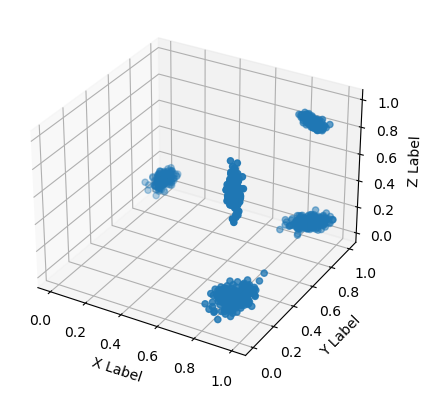

In [13]:
# 3D dataset
X1, _ = make_classification(
    n_samples = 1000,
    n_features = 3,
    n_informative = 3,
    n_redundant = 0,
    n_classes = 5,
    n_clusters_per_class = 1,
    class_sep = 10,
    flip_y = 0,
    random_state = 0
)

# normalize data
X1 = normalize_arr(X1)
 
# creating an empty canvas
fig = plt.figure()
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.scatter3D(X1[:,0],X1[:,1],X1[:,2], cmap='cividis');
# Showing the above plot
plt.show()

In [14]:
data = [(i, [float(item) for item in X1[i]]) for i in range(X1.shape[0])]

schema = T.StructType([T.StructField("id", T.IntegerType(), False),
                               T.StructField("value", T.ArrayType(T.FloatType()), False)])
df1 = spark.createDataFrame(data, schema=schema)

In [15]:
df1.show(5)

+---+--------------------+
| id|               value|
+---+--------------------+
|  0|[0.9598766, 0.869...|
|  1|[0.960757, 0.9383...|
|  2|[0.8898557, 0.162...|
|  3|[0.95036, 0.02584...|
|  4|[0.92977315, 0.87...|
+---+--------------------+
only showing top 5 rows



In [16]:
# dbscan with sklearn
start = time.time()
db = DBSCAN(eps=0.2, min_samples=10).fit(X1)
end = time.time()

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
t1_1 = end-start

In [17]:
print("The number of clusters:", n_clusters_)
print(f"The execution time is {t1_1:.4f} s")

The number of clusters: 5
The execution time is 0.0146 s


In [18]:
# proposed algorithm
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
labels_spark = np.zeros_like(db.labels_)
labels_spark[:] = -1

start = time.time()
df_clusters = run(spark, df1, 10, .2, dist, 3, "checkpoint")
end = time.time()

out1 = df_clusters.distinct().collect()

out1 = df_clusters.distinct().collect()
for item in out1:
    labels_spark[item.point] = item.component
n_clusters_spark_ = len(set(labels_spark)) - (1 if -1 in labels else 0)
n_noise_spark_ = list(labels_spark).count(-1)

t2_1 = end-start

23/02/19 20:21:49 WARN BlockManager: Task 12 already completed, not releasing lock for rdd_25_0


/opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py:149: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  "DataFrame.sql_ctx is an internal property, and will be removed "
/opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [19]:
print("The number of clusters:", n_clusters_spark_)
print(f"The execution time is {t2_1:.4f} s")

The number of clusters: 5
The execution time is 145.7101 s


### Synthetic Dataset2:

number of clusters: 8, 3000 samples in total

eps=0.2, min_samples=10

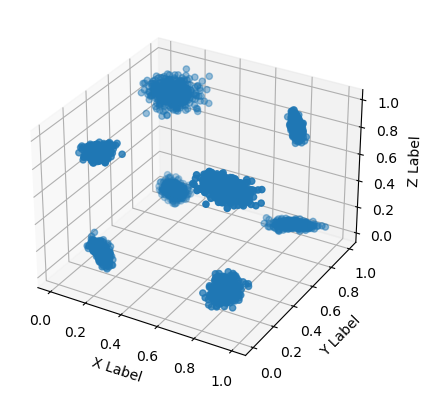

In [20]:
X2, _ = make_classification(
    n_samples = 3000,
    n_features = 3,
    n_informative = 3,
    n_redundant = 0,
    n_classes = 8,
    n_clusters_per_class = 1,
    class_sep = 9,
    flip_y = 0,
    random_state = 0
)

# normalize data
X2 = normalize_arr(X2)

# creating an empty canvas
fig = plt.figure()
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.scatter3D(X2[:,0],X2[:,1],X2[:,2], cmap='cividis');
# Showing the above plot
plt.show()

In [21]:
data = [(i, [float(item) for item in X2[i]]) for i in range(X2.shape[0])]

schema = T.StructType([T.StructField("id", T.IntegerType(), False),
                               T.StructField("value", T.ArrayType(T.FloatType()), False)])
df2 = spark.createDataFrame(data, schema=schema)

In [22]:
# dbscan with sklearn
start = time.time()
db = DBSCAN(eps=0.2, min_samples=10).fit(X2)
end = time.time()

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
t1_2 = end-start

In [23]:
print("The number of clusters:", n_clusters_)
print(f"The execution time is {t1_2:.4f} s")

The number of clusters: 8
The execution time is 0.0296 s


In [24]:
# proposed algorithm
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
labels_spark = np.zeros_like(db.labels_)
labels_spark[:] = -1

start = time.time()
df_clusters = run(spark, df2, 10, .2, dist, 3, "checkpoint")
end = time.time()

out2 = df_clusters.distinct().collect()
for item in out2:
    labels_spark[item.point] = item.component
n_clusters_spark_ = len(set(labels_spark)) - (1 if -1 in labels else 0)
n_noise_spark_ = list(labels_spark).count(-1)
t2_2 = end-start

/opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py:149: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  "DataFrame.sql_ctx is an internal property, and will be removed "
/opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [25]:
print("The number of clusters:", n_clusters_spark_)
print(f"The execution time is {t2_2:.4f} s")

The number of clusters: 8
The execution time is 946.1759 s


### Synthetic Dataset3:

number of clusters: 6, 10000 samples in total

eps=0.2, min_samples=10

In [26]:
X3,_ = make_classification(
    n_samples = 5000, 
    n_features = 3, 
    n_informative = 3,                 
    n_redundant = 0, 
    n_repeated = 0, 
    n_classes = 3, 
    n_clusters_per_class = 2,                      
    class_sep = 10,               
    flip_y = 0)

# normalize data
X3 = normalize_arr(X3)

In [27]:
data = [(i, [float(item) for item in X3[i]]) for i in range(X3.shape[0])]

schema = T.StructType([T.StructField("id", T.IntegerType(), False),
                               T.StructField("value", T.ArrayType(T.FloatType()), False)])
df3 = spark.createDataFrame(data, schema=schema)

In [28]:
# dbscan with sklearn
start = time.time()
db = DBSCAN(eps=0.3, min_samples=10).fit(X3)
end = time.time()

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
t1_3 = end-start 

In [29]:
print("The number of clusters:", n_clusters_)
print(f"The execution time is {t1_3:.4f} s")

The number of clusters: 6
The execution time is 0.0791 s


In [30]:
# proposed algorithm
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
labels_spark = np.zeros_like(db.labels_)
labels_spark[:] = -1

start = time.time()
df_clusters = run(spark, df3, 10, .2, dist, 3, "checkpoint")
end = time.time()

out3 = df_clusters.distinct().collect()
for item in out3:
    labels_spark[item.point] = item.component
n_clusters_spark_ = len(set(labels_spark)) - (1 if -1 in labels else 0)
n_noise_spark_ = list(labels_spark).count(-1)
t2_3 = end-start

23/02/19 20:47:25 WARN BlockManager: Task 8081 already completed, not releasing lock for rdd_493_0


23/02/19 20:47:26 WARN BlockManager: Task 8082 already completed, not releasing lock for rdd_493_0


/opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py:149: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  "DataFrame.sql_ctx is an internal property, and will be removed "


KeyboardInterrupt: 

In [ ]:
print("The number of clusters:", n_clusters_spark_)
print(f"The execution time is {t2_3:.4f} s")

### Synthetic Dataset4:

eps: 0.5, min_pts: 20, sample size: 1000 samples/cluster, 3 clusters in total

Text(0.5, 1.0, 'Data Points')

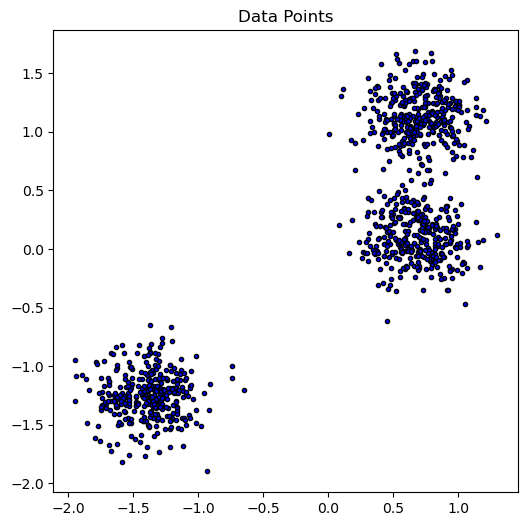

In [31]:
# Dataset1:
centers = [[1, 2], [-5, -5], [1, -1]]
D4, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6, random_state=5)

# normalize data using udf:
# D4 = normalize_arr(D4)

# normalize data using StandScaler()
scaler = StandardScaler()
D4 = scaler.fit_transform(D4)

plt.subplots(figsize=(6, 6))
plt.plot(D4[:, 0], D4[:, 1], 'o', markerfacecolor=[0, 0, 1, 1], 
         markeredgecolor='k', markersize=3, scalex=1, scaley=1)
plt.title('Data Points')

In [32]:
# createDataframe for the proopsed algorithm
data = [(i, [float(item) for item in D4[i]]) for i in range(D4.shape[0])]
schema = T.StructType([T.StructField("id", T.IntegerType(), False),
                        T.StructField("value", T.ArrayType(T.FloatType()), False)])

df4 = spark.createDataFrame(data, schema=schema)

In [33]:
# DBSCAN with sklearn
start = time.time()
db = DBSCAN(eps=0.5, min_samples=20).fit(D4)
end = time.time()

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
t1_4 = end-start

In [34]:
print("The number of clusters:", n_clusters_)
print(f"The execution time is {t1_4:.4f} s")

The number of clusters: 2
The execution time is 0.0417 s


In [ ]:
# proposed algorithm
start = time.time()
df_clusters = run(spark, df4, .5, 20, dist, 2, "checkpoint")
end = time.time()

out4 = df_clusters.distinct().collect()
for item in out4:
    labels_spark[item.point] = item.component
n_clusters_spark_ = len(set(labels_spark)) - (1 if -1 in labels else 0)
n_noise_spark_ = list(labels_spark).count(-1)
t2_4 = end-start

In [ ]:
print("The number of clusters:", n_clusters_spark_)
print(f"The execution time is {t2_4:.4f} s")